### Fill out:
Name & Surname:

Student ID:

## W7&W8 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

We will use diabetes data. Download this data from [the Gitlab site](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/Regression/Diabetes_Data.csv) into the same directory as the notebook on your computer. 

Run the following code from the pre-studio notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

In [2]:
df = pd.read_csv('Diabetes_Data.csv', usecols = range(0,11)) # read the Diabetes dataset in to a pandas dataframe
corrs = df.corr()          # calculate the correlation table
X = df.drop(['Y'],axis=1)  # Create a Dataframe without the target variable Y.
Y = df['Y']                # Extract a Series of the target Y values.

In [3]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.
nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

In [4]:
from sklearn.model_selection import cross_validate, RepeatedKFold # import sklearn methods

# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']],columns=nX.columns)

### Exercise 1 (correlation coefs vs linear regression coefs)

Compare the (mean of) model coefficients computed in the linear regression with the correlation scores found in the initial data analysis in pre-studio notebook. Choose any plot or table which you think is suitable for this comparison. Comment on whether the model fitting results are consistent with the correlation scores.

In [5]:
# Hint 1: Table of correlation coefficients and dataframe with reg. coefs from cross validation are given above.
# Hint 2: Create a dataframe which has the correlations with Y as a column, and then the 
# mean of coefficients computed from the cross_validate method for the other column.
# You will need to scale the coefficients in order to compare this with the correlations (divide by 30, for example). 
# Hint 3: A bar plot seems like a good idea!

#### Exercise 1 solution

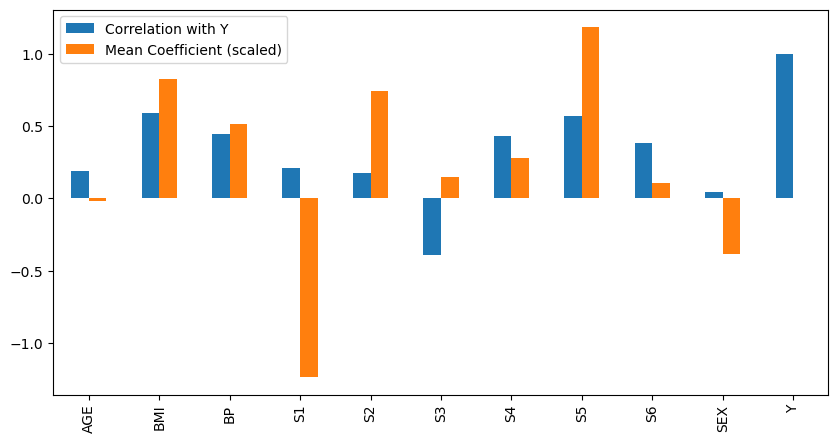

In [6]:
# We create the dataframe 'comparison' consisting of a column containing the correlations of the features with the target,
# as well as a column containing the mean of the coefficients obtained through the cross-validation process above.

comparison = pd.DataFrame({
    "Correlation with Y": df.corr()['Y'],
    "Mean Coefficient (scaled)": coefs.mean() / 30,
})
comparison.plot(kind='bar', figsize=(10, 5));

A high correlation with the target variable does not necessarily guarantee that the model coefficent for the feature variable will be high. This is something to watch out for - there are interactions between the different feature variables which cause differences between the coefficients in a multivariate regression and the coefficient you would see in a univariate model.

### Exercise 2 (coeeficient variability in a simpler model)

Try fitting a linear regression model to a subset of the features. To do this, select 3-4 columns from the normalised dataframe `nX` to use when constructing the train-test split, then fit the model parameters to this new training data as before. Describe how you selected your subset of features. Did the model coefficients for your chosen features turn out to be similar or different to those in the full model given in pre-studio notebook? (Comment on change in variability of the coefficients. If there is a difference, explain why.)

In [7]:
#Settings: 80-20 split, random state 31287.

#Aim is to show variability of corresponding coefficients 
#(train-test-split + cross validation + appropriate plot + compare to pre-studio)

# No regularisation yet.

#### Exercise 2 solution

Note for marking: Any (reasonable) choice of 3-4 features with an explanation is OK.

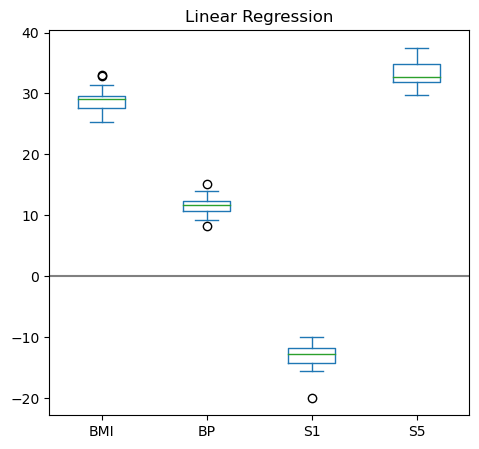

In [8]:
# Here we will use RepeatedKFold to determine the variability of our coefficients in our linear regression

X_train, X_test, Y_train, Y_test = train_test_split(
    nX[["BMI", "BP", "S1", "S5"]], Y, test_size = 0.2,
    random_state = np.random.RandomState(31287)  # Keeps the 'random' split consistent.
)

scores = cross_validate(
    linear, X_train, Y_train,
    cv = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = np.random.RandomState(2351786)),
    return_estimator=True,
)

coefs_ex2 = pd.DataFrame([est.coef_ for est in scores['estimator']],columns = X_train.columns)
ax = coefs_ex2.plot(kind = 'box',figsize=(7, 5))
plt.title('Linear Regression')
plt.axhline(y = 0, color = '.5')
plt.subplots_adjust(left = .3)

S1 variability is lowered significantly. With a simpler model, we see less tendency towards overfitting, so the coefficient values may remain more consistent.

***
In W8 pre-studio notebook we found the optimal tuning parameters ($\alpha$) for both Ridge and Lasso regularisation via numerical experimentation. In practice however, the process of tuning and fitting a linear regression with Ridge or Lasso regularisation is automated through the functions `RidgeCV` and `LassoCV` respectively. When we call the .fit method for `RidgeCV`, cross-valiadation is implemented by performing Ridge linear regression over a variety of tuning parameters in order to determine the optimal tuning parameter $\alpha$. Once the optimal tuning parameter is found, the model can then be fit. In fact, we can extract the optimal tuning parameter $\alpha$ by calling .alpha_. A similar process is utilised for `LassoCV`.

N.B. Both Ridge and Lasso regularisation require the feature set to be normalised. 

### Exercise 3 (RidgeCV)

Here you will use `RidgeCV` from scikit-learn to perform Ridge linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the RidgeCV model by calling RidgeCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `RidgeCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [9]:
from sklearn.linear_model import RidgeCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=1235
) 

ridgecv = RidgeCV(alfas, store_cv_values=True)

# Now you will need to fit the model on the train data using the instantiated model ridgecv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

#### Exercise 3 Solution

In [10]:
# fit ridgecv to the training data and determine the R^2 score for the training set.
ridgecv.fit(X_train, Y_train)
training_score = ridgecv.score(X_train, Y_train)

# use the independent variables for the testing set to predict the target variable
y_pred = ridgecv.predict(X_test)
testing_score = r2_score(Y_test, y_pred)

print(f'The training score is :{training_score:.3f}')
print(f'The testing score is :{testing_score:.3f}')
print(f'The optimal tuning parameter is alpha = {ridgecv.alpha_:.3f}')

The training score is :0.531
The testing score is :0.452
The optimal tuning parameter is alpha = 1.585


Different result: `RidgeCV` finds optimal $\alpha$ across all cross-validated <u>training sets</u>. In our pre-studio, we chose $\alpha$ with the highest <u>testing</u> score (using single train-test-split).

### Exercise 4 (LassoCV)

Here you will use `LassoCV` from scikit-learn to perform Lasso linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the LassoCV model by calling LassoCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `LassoCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [11]:
from sklearn.linear_model import LassoCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size = 0.2,
    random_state = 1235
) 

lassocv = LassoCV(alphas = alfas)

# Now you will need to fit the model on the train data using the instantiated model lassocv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

#### Exercise 4 solution

In [12]:
# fit lassocv to the training data
lassocv.fit(X_train, Y_train)

# Compute the score for the training set
training_score = lassocv.score(X_train, Y_train)

# use the independent variables for the testing set to predict the target variable
y_pred = lassocv.predict(X_test)
testing_score = r2_score(Y_test, y_pred)

print(f'The training score is :{training_score:.3f}')
print(f'The testing score is :{testing_score:.3f}')
print(f'The optimal tuning parameter is alpha = {lassocv.alpha_:.3f}')

The training score is :0.532
The testing score is :0.451
The optimal tuning parameter is alpha = 0.010


Similarly to Q3, `LassoCV` chooses the optimal $\alpha$ across all cross-validated <u>training sets</u>. In our pre-studio, we chose $\alpha$ with the highest <u>testing</u> score (using single train-test-split).

For both `RidgeCV` and `LassoCV`, the optimal tuning parameters are rather different! This is because what is 'optimal' depends on your cross validation method. By default, these RidgeCV and LassoCV do not utilise the same cross validation method we utilised for finding the optimal tuning parameters. You can adjust the cross validation method utilised by RidgeCV and LassoCV by calling the optional argument cv. Some methods include

- k-fold
- Leave-one-out
- Leave-p-out

You can learn more about this by consulting the scikit-learn guide on cross validation.

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (coefficient variability vs multicolinearity)

Similarly to the beginning of this notebook, repeat the k-fold cross-validation test for coefficient variability, but first remove the feature 'S2' from the dataset. Observe the impact on the coefficients for the other features. In particular, look at the coefficient for 'S1'. You should see that the range of values produced for the S1 coefficient is much narrower. Can you think of a reason why this is the case (consider the mathematical form of the model)?

#### Exercise 5 solution

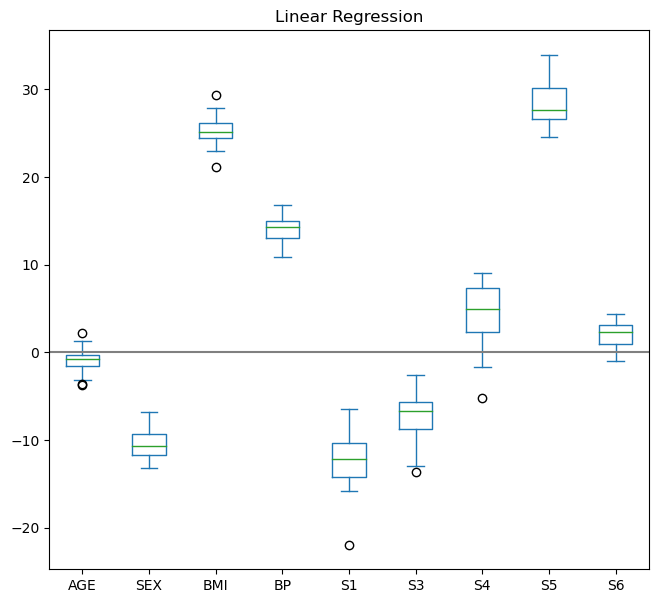

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    nX.drop(columns = "S2"), Y, test_size = 0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
)

scores = cross_validate(
    linear, X_train, Y_train,
    cv=RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = np.random.RandomState(2351786)),
    return_estimator = True,
)

coefs_ex3 = pd.DataFrame([est.coef_ for est in scores['estimator']], columns = X_train.columns)
ax = coefs_ex3.plot(kind = 'box', figsize = (10,7))
plt.title('Linear Regression')
plt.axhline(y = 0, color = '.5')
plt.subplots_adjust(left = .3)

S1 and S2 are strongly correlated. This means we can fit several different models where we 'trade off' the effect of S1 for S2. If we remove S2, we get a more consistent result.